## Identify the encoder type

In [13]:
import chardet
file = 'spam.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

## Import the dataset

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df = pd.read_csv('spam.csv', encoding = 'Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Create a new dataframe with only two variables

In [32]:
new_df = df[['v1','v2']].copy()
new_df.columns = ['label','message']

new_df['label'] = pd.get_dummies(new_df['label'], drop_first = True)
new_df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Data preprocessing

In [33]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [34]:
ps = PorterStemmer()
corpus = []
for i in range(len(new_df)):
    review = re.sub('[^a-zA-Z]', ' ', new_df['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(j) for j in review if j not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)   

## Implement BOW model

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus)

In [40]:
y = new_df.iloc[:,0].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

## Split the model 

In [43]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Train the model using Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
model = classifier.fit(xtrain, ytrain)
ypred = model.predict(xtest)

## Check the performance

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred)

<AxesSubplot:>

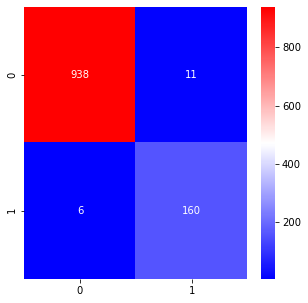

In [60]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'bwr')

In [62]:
ascore = accuracy_score(ytest, ypred)
print('Accuracy {}'.format(ascore*100))

Accuracy 98.47533632286995
